In [1]:
import pytraj as pt
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib
from matplotlib import pyplot as plt
import gc
import pandas as pd
import seaborn as sns
import pprint, pickle

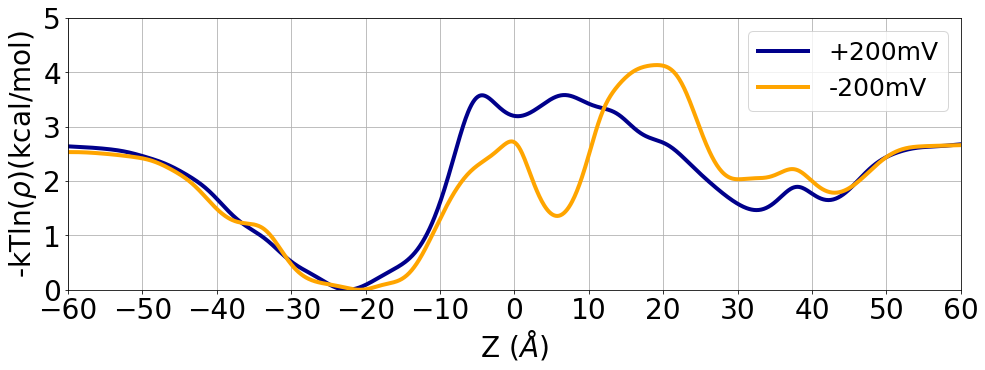

In [26]:
temperature=310.15
beta=1/(temperature*(0.593)/298)

# Read -200mV cAMP data
pk1=open('pos200mV_ligZoffset.pk1','rb')
data1=pickle.load(pk1)
#pprint.pprint(data1)
pk1.close()
#print np.array(data1.values()[0]).shape
rligZ_offsetData=[]
for ind in np.arange(0,27):
        rlig_selData=np.array(data1.values()[ind])
        rligZ_offsetData = np.append(rligZ_offsetData,rlig_selData)
fig,ax1 = plt.subplots(figsize=(16,5))
ax1.grid()
positions=np.linspace(np.min(rligZ_offsetData),np.max(rligZ_offsetData),1500)
newligKDE=sp.stats.gaussian_kde(np.ndarray.flatten(rligZ_offsetData))
ax1.plot(positions,-np.log(newligKDE(positions))/beta-np.min(-np.log(newligKDE(positions))/beta),
         linewidth=4,color='darkblue',label='+200mV')

# Read -200mV cAMP data
pk2=open('neg200mV_ligZoffset.pk1','rb')
data1=pickle.load(pk2)
pk2.close()
rligZ_offsetData=[]
for ind in np.arange(0,27):
        rlig_selData=np.array(data1.values()[ind])
        rligZ_offsetData = np.append(rligZ_offsetData,rlig_selData)

positions=np.linspace(np.min(rligZ_offsetData),np.max(rligZ_offsetData),1500)
newligKDE=sp.stats.gaussian_kde(np.ndarray.flatten(rligZ_offsetData))
ax1.plot(positions,-np.log(newligKDE(positions))/beta-np.min(-np.log(newligKDE(positions))/beta),
         linewidth=4,color='orange',label='-200mV')

ax1.set_xlim(-60,60)
ax1.set_ylim(0,5)
ax1.set_xlabel('Z ($\AA$)',fontsize=28)
ax1.set_ylabel(r'-kTln($\rho$)(kcal/mol)',fontsize=28)
ax1.legend()
ax1.legend(fontsize=25)
ax1.tick_params(axis='x', which='major', labelsize=28,colors='black')
ax1.tick_params(axis='y', which='major', labelsize=28,colors='black')
ax1.set_xticks(np.arange(-60,70,10))
ax1.set_yticks(np.arange(0,6,1))
plt.show()